# Exploratory Data Analysis of Laps

In [81]:
import fastf1
import importlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.collections import LineCollection

import f1_strategy_simulator as sim
import f1_strategy_simulator.cleaner.clean_one_race
import f1_strategy_simulator.common.enums


importlib.reload(sim)  # In case the module was updated
importlib.reload(f1_strategy_simulator.cleaner.clean_one_race)
importlib.reload(f1_strategy_simulator.common.enums)

<module 'f1_strategy_simulator.common.enums' from '/Users/ella.smorenburg/Desktop/Ella/Personal/Repositories/f1-strategy-simulator/f1_strategy_simulator/common/enums.py'>

In [82]:
event = 'Zandvoort'
year = 2024
session_type = 'R'
driver = 'VER'

In [83]:
session = fastf1.get_session(year, event, session_type)
session.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']


In [84]:
# from f1_strategy_simulator.cleaner.clean_one_race import clean_race_data

driver_laps = sim.cleaner.clean_one_race.clean_race_data(session, year, event, session_type, driver).reset_index(drop=True)
print(driver_laps.head())


  driver  lap_number  lap_time_s  stint compound  tyre_life  position  \
0    VER         1.0      79.915    1.0   MEDIUM        1.0       1.0   
1    VER         2.0      76.106    1.0   MEDIUM        2.0       1.0   
2    VER         3.0      76.131    1.0   MEDIUM        3.0       1.0   
3    VER         4.0      76.432    1.0   MEDIUM        4.0       1.0   
4    VER         5.0      76.181    1.0   MEDIUM        5.0       1.0   

   pit_stop_in_lap  pit_stop_out_lap  GREEN  YELLOW  SAFETY_CAR  RED_FLAG  \
0            False             False      1       0           0         0   
1            False             False      1       0           0         0   
2            False             False      1       0           0         0   
3            False             False      1       0           0         0   
4            False             False      1       0           0         0   

   VIRTUAL_SAFETY_CAR  VSC_ENDING  lap_time_approx_s  
0                   0           0          

In [85]:
driver_laps.describe()

,lap_number,lap_time_s,stint,tyre_life,position,GREEN,YELLOW,SAFETY_CAR,RED_FLAG,VIRTUAL_SAFETY_CAR,VSC_ENDING,lap_time_approx_s
count,72.00000,72.000000,72.00000,72.000000,72.000000,72.0,72.0,72.0,72.0,72.0,72.0,72.000000
mean,36.50000,75.950208,1.62500,19.625000,1.916667,1.0,0.0,0.0,0.0,0.0,0.0,75.950208
std,20.92845,2.421243,0.48752,12.215711,0.764531,0.0,0.0,0.0,0.0,0.0,0.0,2.421243
min,1.00000,74.752000,1.00000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,74.752000
25%,18.75000,75.052000,1.00000,9.750000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,75.052000
50%,36.50000,75.269000,2.00000,18.500000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,75.269000
75%,54.25000,76.310500,2.00000,27.250000,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,76.310500
max,72.00000,94.574000,2.00000,45.000000,5.000000,1.0,0.0,0.0,0.0,0.0,0.0,94.574000


### Check for duplication and empty values

In [86]:
driver_laps.duplicated().sum()

np.int64(0)

In [87]:
pd.isnull(driver_laps).sum()

driver                0
lap_number            0
lap_time_s            0
stint                 0
compound              0
tyre_life             0
position              0
pit_stop_in_lap       0
pit_stop_out_lap      0
GREEN                 0
YELLOW                0
SAFETY_CAR            0
RED_FLAG              0
VIRTUAL_SAFETY_CAR    0
VSC_ENDING            0
lap_time_approx_s     0
dtype: int64

No duplicated or empty rows, no need for deletion or imputation.

### Graphs

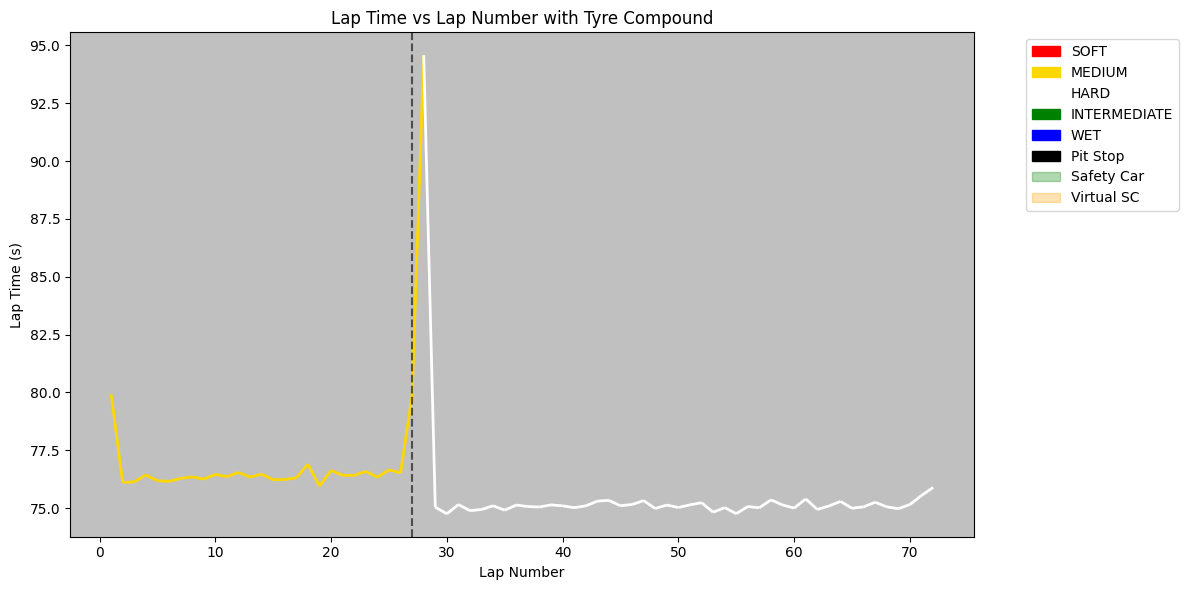

In [88]:
# Map compounds to colors
compound_colors = {'SOFT': 'red', 'MEDIUM': 'gold', 'HARD': 'white', 'INTERMEDIATE': 'green', 'WET': 'blue'}

x = driver_laps['lap_number'].values
y = driver_laps['lap_time_approx_s'].values
comp = driver_laps['compound'].map(compound_colors).values

# Line segments for tyre compound
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=comp[:-1], linewidths=2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.add_collection(lc)
ax.autoscale()
ax.set_facecolor('silver')
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Lap Time vs Lap Number with Tyre Compound')

# Pit stops as vertical lines
pit_stop_laps = driver_laps[driver_laps['pit_stop_in_lap']].index.tolist()
for lap in pit_stop_laps:
    ax.axvline(x=lap+1, color='black', linestyle='--', alpha=0.6)

# Shade SC / VSC periods
def shade_periods(flag_column, color, alpha=0.3):
    laps = driver_laps.index[driver_laps[flag_column] == 1].tolist()
    if not laps:
        return
    # Find continuous periods
    start = laps[0]
    for i in range(1, len(laps)):
        if laps[i] != laps[i-1] + 1:
            ax.axvspan(start+1, laps[i-1]+2, color=color, alpha=alpha)
            start = laps[i]
    ax.axvspan(start+1, laps[-1]+2, color=color, alpha=alpha)

shade_periods('SAFETY_CAR', 'green')
shade_periods('VIRTUAL_SAFETY_CAR', 'orange')

# Custom legend
compound_patches = [mpatches.Patch(color=color, label=comp) for comp, color in compound_colors.items()]
special_patches = [
    mpatches.Patch(color='black', label='Pit Stop'),
    mpatches.Patch(color='green', alpha=0.3, label='Safety Car'),
    mpatches.Patch(color='orange', alpha=0.3, label='Virtual SC')
]
ax.legend(handles=compound_patches + special_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


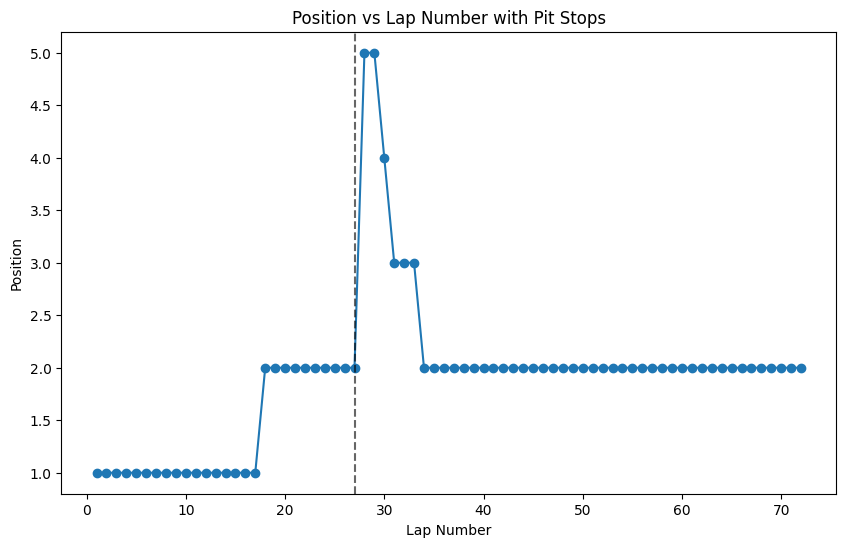

In [89]:
x = driver_laps['position']
y = driver_laps['lap_number']

# Pit stops as vertical lines
pit_stop_laps = driver_laps[driver_laps['pit_stop_in_lap']].index.tolist()

plt.figure(figsize=(10, 6))
plt.plot(y, x, marker='o')

# Adding vertical lines for pit stops
for lap in pit_stop_laps:
    plt.axvline(x=lap+1, color='black', linestyle='--', alpha=0.6)

plt.xlabel('Lap Number')
plt.ylabel('Position')
plt.title('Position vs Lap Number with Pit Stops')
plt.show()


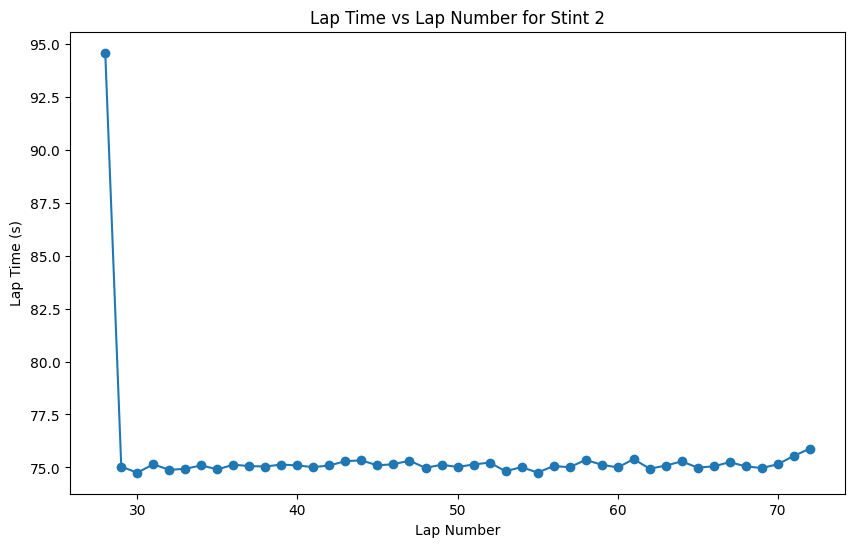

In [90]:
# plot that zooms on one stint only
stint_number = 2
stint_two_laps = driver_laps[driver_laps['stint'] == stint_number]
plt.figure(figsize=(10, 6))
plt.plot(stint_two_laps['lap_number'], stint_two_laps['lap_time_approx_s'], marker='o')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title(f'Lap Time vs Lap Number for Stint {stint_number}')
plt.show()

Let's remove the first lap of this stint, which is the outlap and includes the time in the pit, to give us a less flattened view of the lap times.

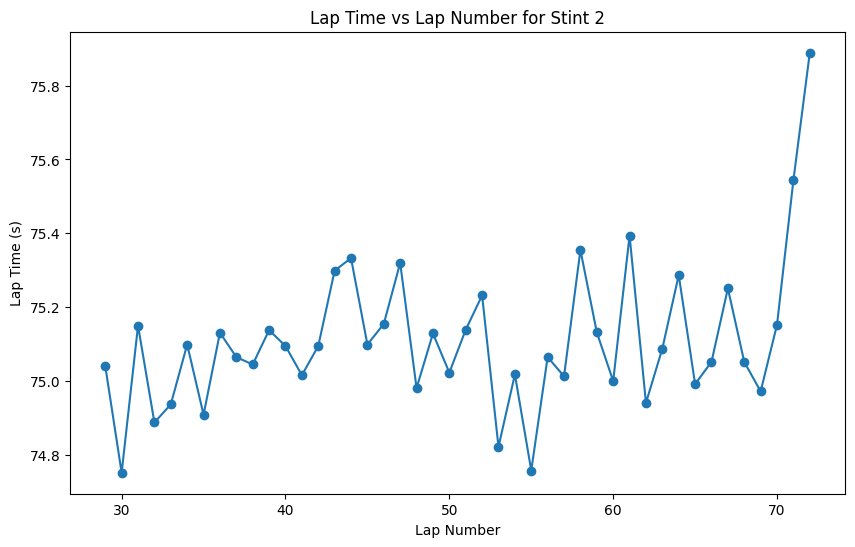

In [91]:
# plot that zooms on one stint only
stint_number = 2
stint_two_laps_no_outlap = driver_laps[driver_laps['stint'] == stint_number][1:]
plt.figure(figsize=(10, 6))
plt.plot(stint_two_laps_no_outlap['lap_number'], stint_two_laps_no_outlap['lap_time_approx_s'], marker='o')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title(f'Lap Time vs Lap Number for Stint {stint_number}')
plt.show()

When looking at Verstappen's second stint in Zandvoort 2024, it's interesting that the laptime stays very close to 75 seconds (or 1:15:00 minutes). This could be because of:
- Zandvoort maybe doesn't lead to much tyre degradation;
- Verstappen is very good at running consistent lap times;
- The car becomes lighter with less fuel, which "cancels out" the worsening tyre life.

Or a combination of any of these 3. There is still a visible upwards trend in lap times though.

### Compute tyre degradation

Slope: 0.005707892882311503, Intercept: 74.82195595489782, R-squared: 0.13284646366892902


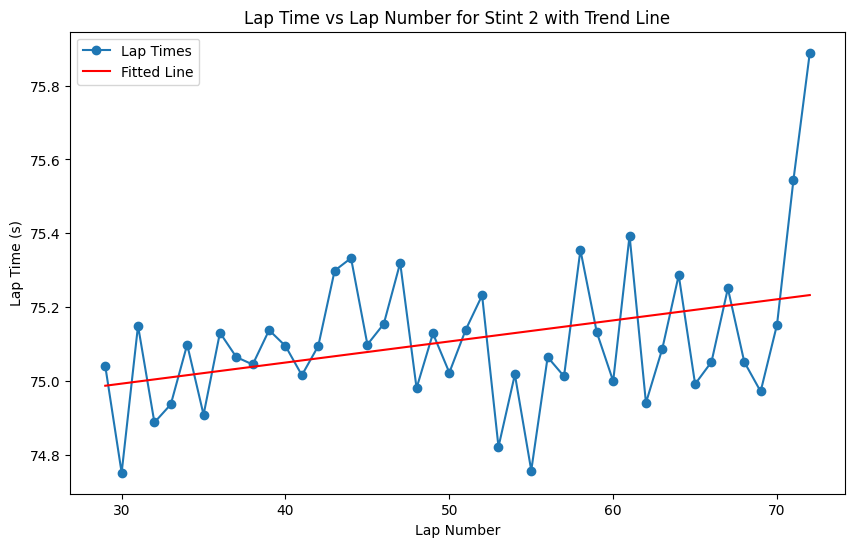

In [92]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(stint_two_laps_no_outlap['lap_number'], stint_two_laps_no_outlap['lap_time_approx_s'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")
plt.figure(figsize=(10, 6))
plt.plot(stint_two_laps_no_outlap['lap_number'], stint_two_laps_no_outlap['lap_time_approx_s'], marker='o', label='Lap Times')
plt.plot(stint_two_laps_no_outlap['lap_number'], intercept + slope*stint_two_laps_no_outlap['lap_number'], 'r', label='Fitted Line')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title(f'Lap Time vs Lap Number for Stint {stint_number} with Trend Line')
plt.legend()

The above plot and printed slope value shows us that the lienar regression model that was fitted models the tyre degredation for this stint (which is on the hard tyre, as seen in a previous figure) is 0.0057 seconds, or 0.006 rounded up. Let's check if this slope value is different for the other compound used in this race (the medium).

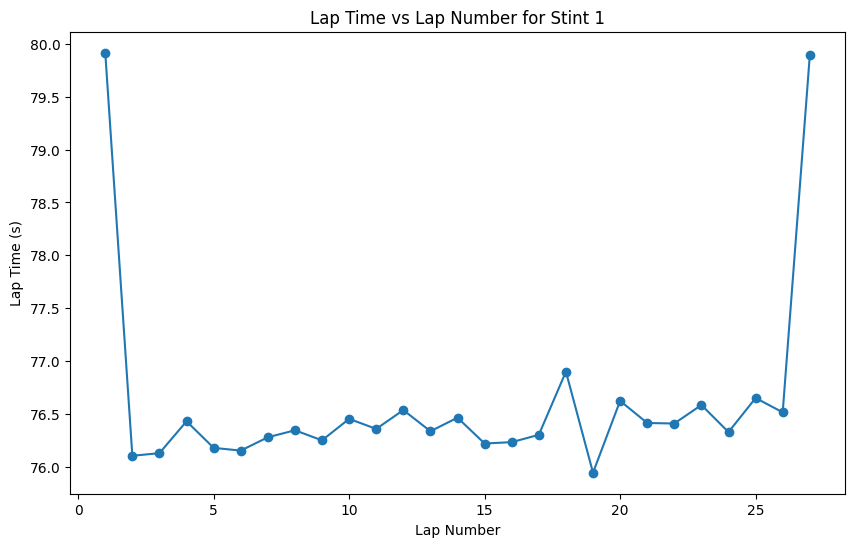

In [93]:
# plot that zooms on one stint only
stint_number = 1
stint_one_laps = driver_laps[driver_laps['stint'] == stint_number]
plt.figure(figsize=(10, 6))
plt.plot(stint_one_laps['lap_number'], stint_one_laps['lap_time_approx_s'], marker='o')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title(f'Lap Time vs Lap Number for Stint {stint_number}')
plt.show()

The figure shows us that we should delete the first lap and the last lap of the first stint (the starting lap and the out lap), since they're outliers and don't give us the information on the tyre degradation that we need.

Slope: 0.0133176923076923, Intercept: 76.1810323076923, R-squared: 0.22941199774755863


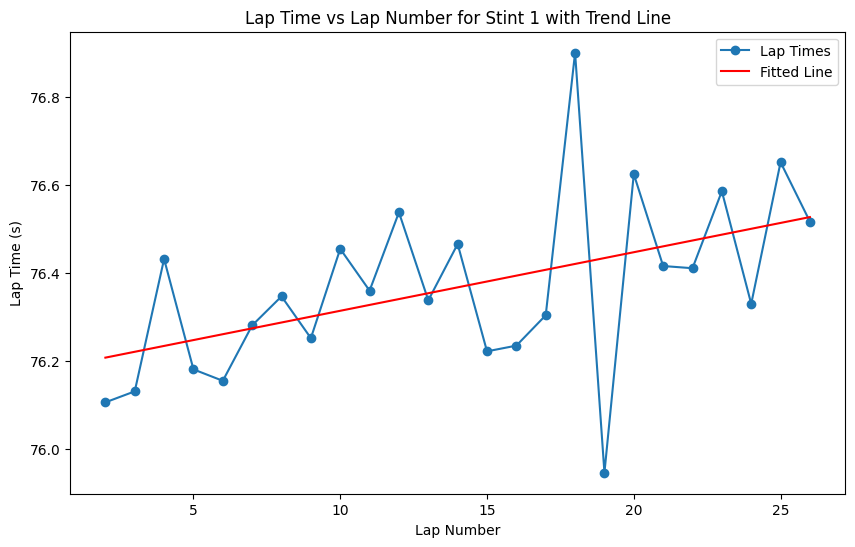

In [94]:
stint_one_laps = driver_laps[driver_laps['stint'] == 1][1:-1]

slope, intercept, r_value, p_value, std_err = stats.linregress(stint_one_laps['lap_number'], stint_one_laps['lap_time_approx_s'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")
plt.figure(figsize=(10, 6))
plt.plot(stint_one_laps['lap_number'], stint_one_laps['lap_time_approx_s'], marker='o', label='Lap Times')
plt.plot(stint_one_laps['lap_number'], intercept + slope*stint_one_laps['lap_number'], 'r', label='Fitted Line')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (s)')
plt.title(f'Lap Time vs Lap Number for Stint {stint_number} with Trend Line')
plt.legend()

The slope value for this linear regression model is a bit higher, as we would expect from a softer tyre compound: the tyre degrates with 0.01331 seconds per lap, rounded to 0.0133.

The aim of this project is to simulate race strategies for any race, meaning also ones in the future. Since we don't have data on future race's tyre degradations, I will take the tyre degradation for the latest held race for the track I want to simulate for; If I want to simulate for the Monaco Grand Prix in 2026, I will take the tyre degradation per lap for the driver I want to simulate the race strategy for from the previous year.

To also take into account rain, I will take the most recent year where the race has no intermediate tyres used.

In [105]:
def calculate_tyre_degradation(driver, race, year, compound):
    earlier_year = get_last_race_without_rain(race, year-1)
    session = fastf1.get_session(earlier_year, race, "R")
    session.load()

    cleaned_session = (
        sim.cleaner.clean_one_race.clean_race_data(
            session, year, race, "R", driver
        )
        .reset_index(drop=True)
    )

    # filter only the compound and remove safety car / VSC / red flag laps
    mask = (
        (cleaned_session['compound'] == compound) &
        (cleaned_session['RED_FLAG'] == 0) &
        (cleaned_session['YELLOW'] == 0) &
        (cleaned_session['SAFETY_CAR'] == 0) &
        (cleaned_session['VIRTUAL_SAFETY_CAR'] == 0) &
        (cleaned_session['VSC_ENDING'] == 0)
    )
    compound_laps = cleaned_session[mask].copy()

    # remove in- and out-laps explicitly
    compound_laps = compound_laps[
        (~compound_laps['pit_stop_in_lap']) & (~compound_laps['pit_stop_out_lap']) & (compound_laps['lap_number'] != 1.0)
    ]

    # group by stints (assuming you have a 'stint' column in your cleaned data)
    stints = compound_laps.groupby('stint')

    stint_deg = {}
    for stint_number, stint_data in stints:
        if len(stint_data) < 3:
            # too few laps to fit a line
            continue
        slope, _, _, _, _ = stats.linregress(
            stint_data['lap_number'], stint_data['lap_time_approx_s']
        )
        stint_deg[stint_number] = slope

        plot_linear_regression(stint_data, stint_number)

    avg_deg = np.mean(list(stint_deg.values()))

    return avg_deg  # dict of {stint_number: slope}


def get_last_race_without_rain(race, year):
    wet_compounds = ['INTERMEDIATE', 'WET']
    while True:
        # year_to_check = year - 1
        session_previous_year = fastf1.get_session(year, race, 'R')
        session_previous_year.load()
        driver_laps_previous_year = session_previous_year.laps
        if driver_laps_previous_year['Compound'].isin(wet_compounds).any():
            year -= 1
        else:
            return year
        
def plot_linear_regression(laps, stint_number):
    slope, intercept, _, _, _ = stats.linregress(laps['lap_number'], laps['lap_time_approx_s'])
    plt.figure(figsize=(10, 6))
    plt.plot(laps['lap_number'], laps['lap_time_approx_s'], marker='o', label='Lap Times')
    plt.plot(laps['lap_number'], intercept + slope*laps['lap_number'], 'r', label='Fitted Line')
    plt.xlabel('Lap Number')
    plt.ylabel('Lap Time (s)')
    plt.title(f'Lap Time vs Lap Number for Stint {stint_number} with Trend Line')
    plt.legend()
    plt.show()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core

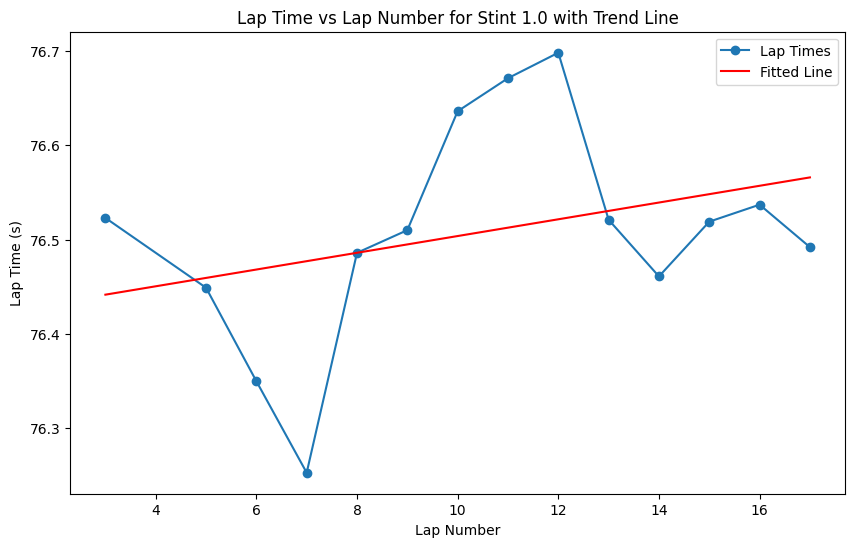

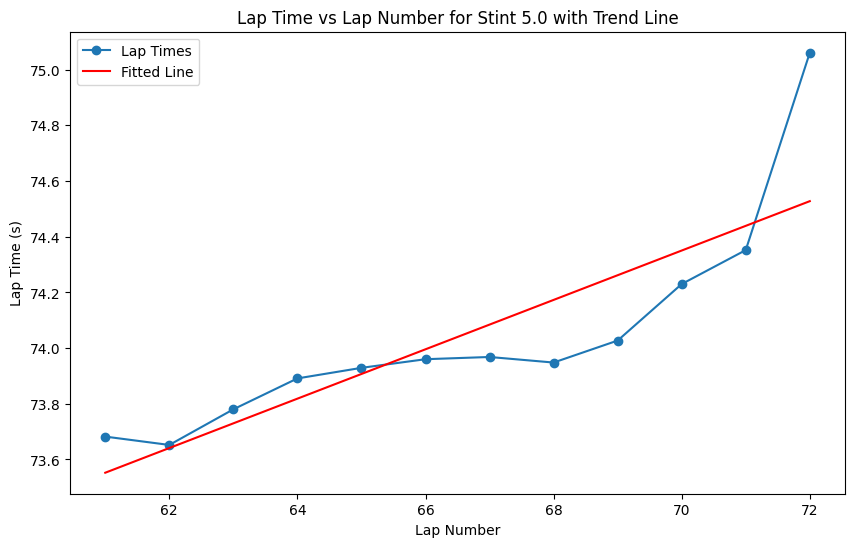

In [106]:
tyre_deg_soft = calculate_tyre_degradation(driver, event, year, 'SOFT')

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

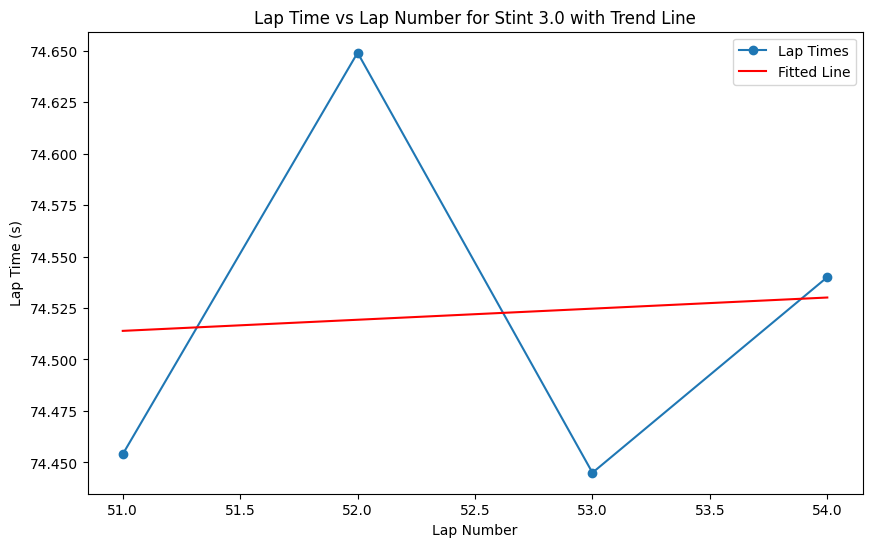

In [107]:
tyre_deg_hard = calculate_tyre_degradation(driver, event, year, 'HARD')

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

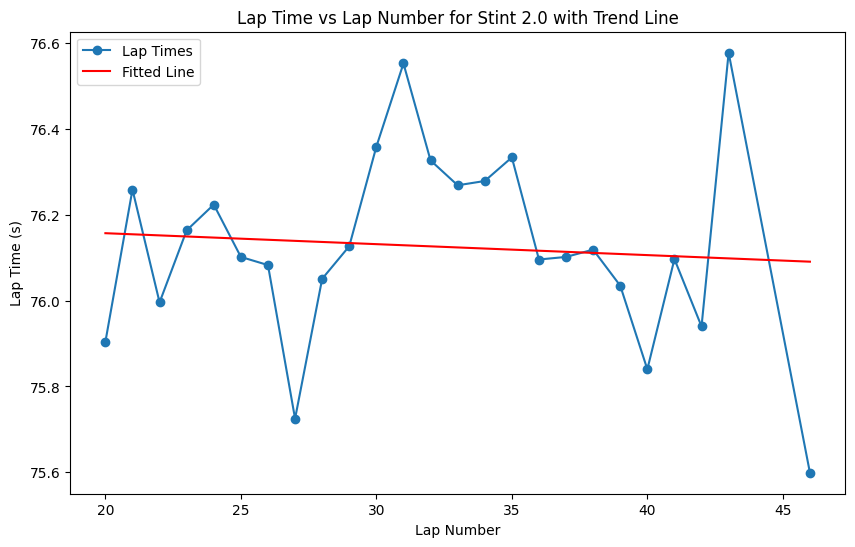

In [108]:
tyre_deg_medium = calculate_tyre_degradation(driver, event, year, 'MEDIUM')

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '16', '44', '11', '14', '4', '55', '31', '18', '10', '23', '47', '5', '20', '24', '3', '6', '77', '22']


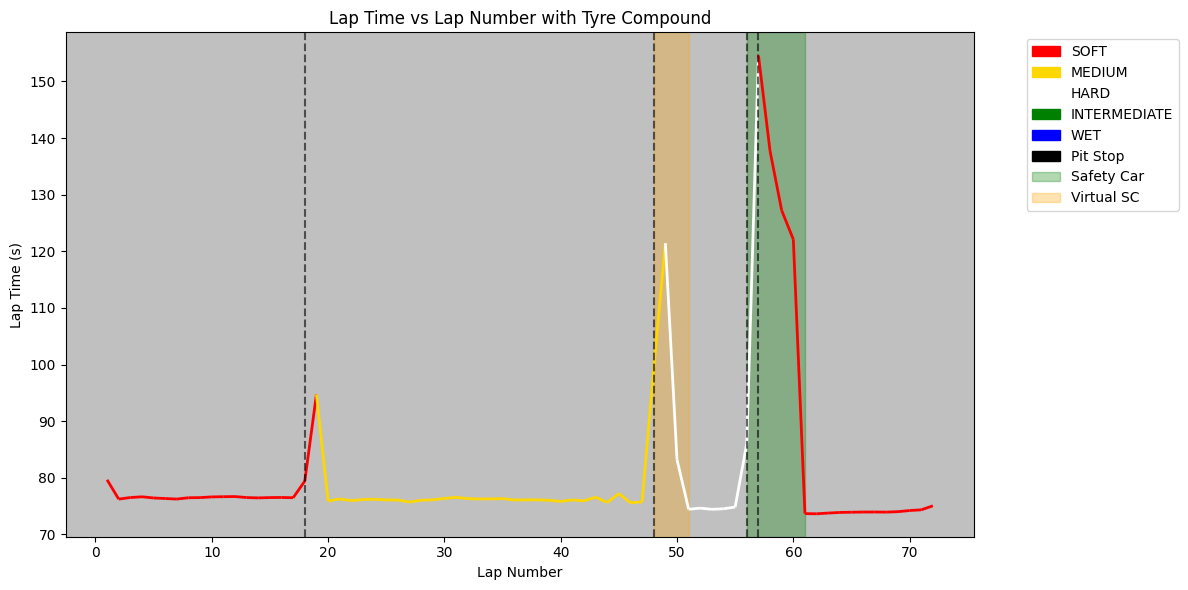

In [109]:
# Map compounds to colors
compound_colors = {'SOFT': 'red', 'MEDIUM': 'gold', 'HARD': 'white', 'INTERMEDIATE': 'green', 'WET': 'blue'}

session = fastf1.get_session(2022, "Zandvoort", "R")
session.load()

cleaned_session = sim.cleaner.clean_one_race.clean_race_data(session, year, event, session_type, driver).reset_index(drop=True)

x = cleaned_session['lap_number'].values
y = cleaned_session['lap_time_approx_s'].values
comp = cleaned_session['compound'].map(compound_colors).values

# Line segments for tyre compound
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=comp[:-1], linewidths=2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.add_collection(lc)
ax.autoscale()
ax.set_facecolor('silver')
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Lap Time vs Lap Number with Tyre Compound')

# Pit stops as vertical lines
pit_stop_laps = cleaned_session[cleaned_session['pit_stop_in_lap']].index.tolist()
for lap in pit_stop_laps:
    ax.axvline(x=lap+1, color='black', linestyle='--', alpha=0.6)

# Shade SC / VSC periods
def shade_periods(flag_column, color, alpha=0.3):
    laps = cleaned_session.index[cleaned_session[flag_column] == 1].tolist()
    if not laps:
        return
    # Find continuous periods
    start = laps[0]
    for i in range(1, len(laps)):
        if laps[i] != laps[i-1] + 1:
            ax.axvspan(start+1, laps[i-1]+2, color=color, alpha=alpha)
            start = laps[i]
    ax.axvspan(start+1, laps[-1]+2, color=color, alpha=alpha)

shade_periods('SAFETY_CAR', 'green')
shade_periods('VIRTUAL_SAFETY_CAR', 'orange')

# Custom legend
compound_patches = [mpatches.Patch(color=color, label=comp) for comp, color in compound_colors.items()]
special_patches = [
    mpatches.Patch(color='black', label='Pit Stop'),
    mpatches.Patch(color='green', alpha=0.3, label='Safety Car'),
    mpatches.Patch(color='orange', alpha=0.3, label='Virtual SC')
]
ax.legend(handles=compound_patches + special_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


While a positive slope for linear regression would be expected (as lap times instinctively get longer the older the tyres), the above slope values show an instance of a negative value. Because of this, I will also take into account the fact that fuel burns and the car gets lighter. 


Since information on how much time is won per lap based solely on fuel being burnt is not available from a reliable source, I will make an educated assumption that the lap times will decrease by 0.03 seconds every lap, and subtract this number from the 
Assumptions have been made in online forums that lap times decrease by 0.3 seconds for every 10kg of fuel burnt. From https://www.degruyterbrill.com/document/doi/10.1515/nleng-2018-0171/html the estimate of a Formula 1 car burning around 1.2kg of fuel per lap is established. 

10.0 / 1.2 = 8
0.3 / 8 = 0.0375

So I will subtract 0.0375 seconds from lap times to normalise the lap times for fuel consumption making the car lighter and thus faster.

In [114]:
tyre_deg_soft_fuel_corrected = tyre_deg_soft + 0.0375
tyre_deg_medium_fuel_corrected = tyre_deg_medium + 0.0375
tyre_deg_hard_fuel_corrected = tyre_deg_hard + 0.0375

In [115]:
print(f"soft: fuel corrected: {tyre_deg_soft_fuel_corrected}, not fuel corrected: {tyre_deg_soft}")
print(f"medium: fuel corrected: {tyre_deg_medium_fuel_corrected}, not fuel corrected: {tyre_deg_medium}")
print(f"hard: fuel corrected: {tyre_deg_hard_fuel_corrected}, not fuel corrected: {tyre_deg_hard}")

soft: fuel corrected: 0.08627993544916658, not fuel corrected: 0.04877993544916658
medium: fuel corrected: 0.03494647295537943, not fuel corrected: -0.0025535270446205684
hard: fuel corrected: 0.04290000000000305, not fuel corrected: 0.0054000000000030465
